# Задание №3

**Формулировка:**

- Исследовать поведение итерационной последовательности при решении уравнения $z^3 - 1 = 0$ в комплексной плоскости методом Ньютона. В качестве начального приближения использовать точки, находящиеся в квадрате $-2 <= Re(z) <=2, -2 <= Im(z) <=2 $ с разрешением, соответствующим одному пикселу на экране компьютера. 

- В зависимости от того, к какому из трех корней уравнения сойдется итерационная последовательность, присвоить начальной точке один из трех выбранных цветов, если последовательность не сойдется, то присвоить начальной точке четвертый цвет. 

- Убедиться, что области притяжения трех корней уравнения (т.н. бассейны) имеют фрактальную границу. Нарисовать траектории сходимости для произвольно выбранных начальных приближений.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Начальные данные №1

In [2]:
def f(z):
    return z**3 - 1

coeffs = [1, 0, 0, -1]

def f_prime(z):
    return 3*z**2

In [3]:
colors = ['xkcd:sunny yellow', 
          'xkcd:hot green', 
          'b', 
          'r']

## Начальные данные №2

In [4]:
def f1(z):
    return z**3 - 2*z + 2

coeffs1 = [1, 0, -2, 2]

def f1_prime(z):
    return 3*z**2 - 2

In [5]:
colors1 = ['xkcd:bright light blue', 
           'xkcd:light lilac', 
           'xkcd:candy pink', 
           'xkcd:vivid blue']

## Начальные данные №3

In [6]:
def f2(z):
    return z**6 + z**3 - 1

coeffs2 = [1, 0, 0, 1, 0, 0, -1]

def f2_prime(z):
    return 5*z**5 + 3*z**2

In [7]:
colors2 = ['xkcd:bright blue', 
           'xkcd:bright purple', 
           'xkcd:yellowish orange', 
           'xkcd:pastel yellow', 
           'xkcd:bright pink', 
           'xkcd:aqua green', 
           'w']

## Решение

In [8]:
def find_root_by_newton(f, f_prime, appr, max_iter=100, eps=1e-14, tolerance=1e-10):
    """Iteratively finding root with Newton's method.
    
    Args: 
        f (function):           function that we find root of.
        f_prime (function):     first derivative of f.
        appr (float | complex): approximation to root of f.
        max_iter (int):         max number of iterations.
        eps (float):            minimal bound such that if
                                f_prime < eps we finish 
                                algorithm.
        tolerance (float):      value such that if difference
                                between results less than
                                tolerance, we finish.
        
    Returns: 
        is_found (bool):        exists a solution.
        appr (float | complex): obtained approximation to root.
        iterations (int):       at what iteration is found.
    """
    iterations = 0
    is_found = False
    for i in range(max_iter):
        y = f(appr)
        y_prime = f_prime(appr)
        
        iterations += 1
        
        if(np.absolute(y_prime) < eps):
            return (is_found, appr, iterations)
        
        old_appr = appr
        appr = old_appr - y/y_prime
        if(np.absolute(old_appr - appr) <= tolerance):
            is_found = True
            return (is_found, appr, iterations)
    
    return (is_found, appr, iterations)

In [9]:
def colorize(f, f_prime, coeffs, colors, appr, tolerance=1e-10):
    """Getting color of approximation according to colors of function roots.
    
    Args: 
        f (function):           function that we find root of.
        f_prime (function):     first derivative of f.
        coeffs (list<float>):   polynomial coefficients.
        colors (list<string>):  colors for each root + color for bad approximation.
        appr (float | complex): approximation to root.
        tolerance (float):      value such that if difference
                                between approximate value and root
                                less than tolerance, return color.
                                
    Returns:
        (string): color of appr.
    """
    newton = find_root_by_newton(f, f_prime, appr)
    roots = np.roots(coeffs)
    if(newton[0]):
        for i in range(len(roots)):
            if(np.absolute(newton[1]-roots[i]) <= tolerance):
                return colors[i]
            
    return colors[len(colors)-1]

In [10]:
def visualization(f, f_prime, coeffs, colors, re_min_bound=-2, 
                  re_max_bound=2, im_min_bound=-2, im_max_bound=2, point_num=200):
    """Visualizing Newton fractal for given function.
    
    Args:
        f (function):           function that we find root of.
        f_prime (function):     first derivative of f.
        coeffs (list<float>):   polynomial coefficients.
        colors (list<string>):  colors for each root + color for bad approximation.
        re_min_bound (float):   min bound for real part of approximate value.
        re_max_bound (float):   max bound for real part of approximate value.
        im_min_bound (float):   min bound for imaginary part of approximate value.
        im_max_bound (float):   max bound for imaginary part of approximate value.
        point_num (int):        number of points on axis.
    """
    xs = np.linspace(re_min_bound, re_max_bound, point_num)
    ys = np.linspace(im_min_bound, im_max_bound, point_num)
    xs = np.append(xs, [0])
    ys = np.append(ys, [0])
    cs = []
    xs_new = []
    ys_new = []
    
    for i in xs:
        for j in ys:
            xs_new.append(i)
            ys_new.append(j)
            cs.append(colorize(f, f_prime, coeffs, colors, complex(i,j)))
        
    plt.figure(figsize=(10, 10))
    plt.scatter(xs_new, ys_new, color=cs)
    plt.show()
    
    pass

## Тестирование

### №1

In [11]:
find_root_by_newton(f, f_prime, (1+2j))

(True, (1+1.2874209973206913e-25j), 23)

In [12]:
colorize(f, f_prime, coeffs, colors, 0)

'r'

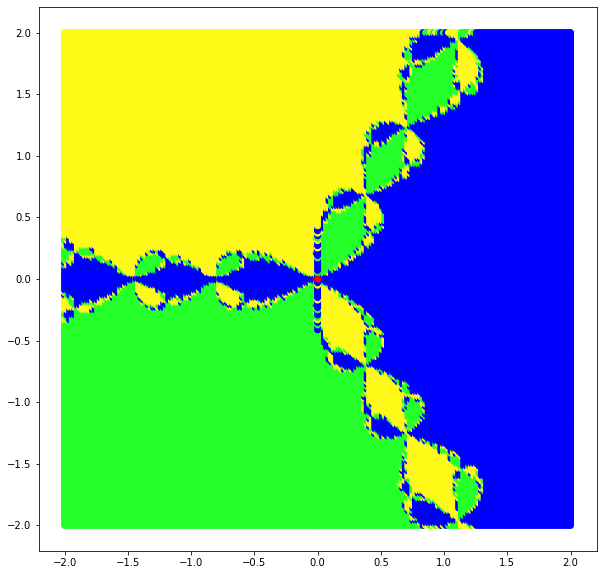

In [13]:
visualization(f, f_prime, coeffs, colors)

### №2

In [14]:
find_root_by_newton(f1, f1_prime, (1+2j))

(True, (0.8846461771193157+0.5897428050222056j), 7)

In [15]:
colorize(f1, f1_prime, coeffs1, colors1, 0)

'xkcd:vivid blue'

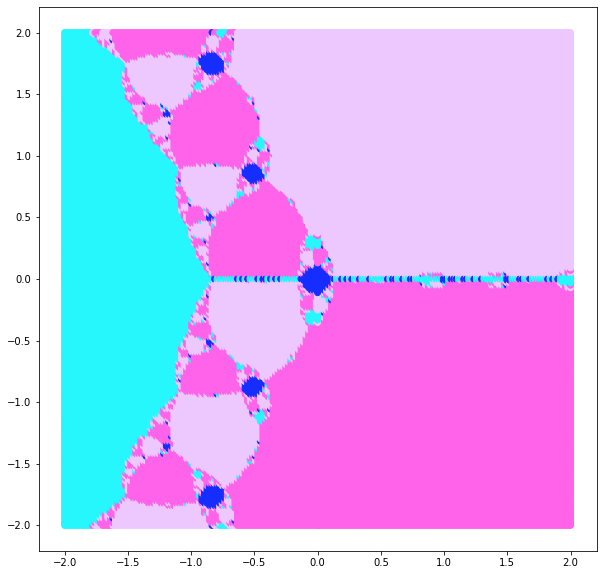

In [16]:
visualization(f1, f1_prime, coeffs1, colors1)

### №3

In [17]:
find_root_by_newton(f2, f2_prime, (1+2j))

(True, (0.5869924983397563+1.0167008308068137j), 22)

In [18]:
colorize(f2, f2_prime, coeffs2, colors2, (1+2j))

'xkcd:bright purple'

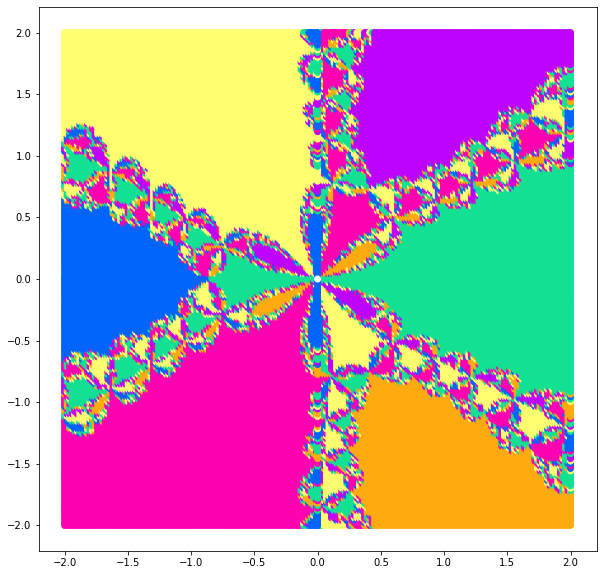

In [19]:
visualization(f2, f2_prime, coeffs2, colors2)